In [1]:
import torch

import scipy.io
import matplotlib.pyplot as plt

from pathlib import Path

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [2]:
# load input spike data
data_folder = Path.cwd() / 'data' / '01.mat'
mat = scipy.io.loadmat(data_folder) # animal 01

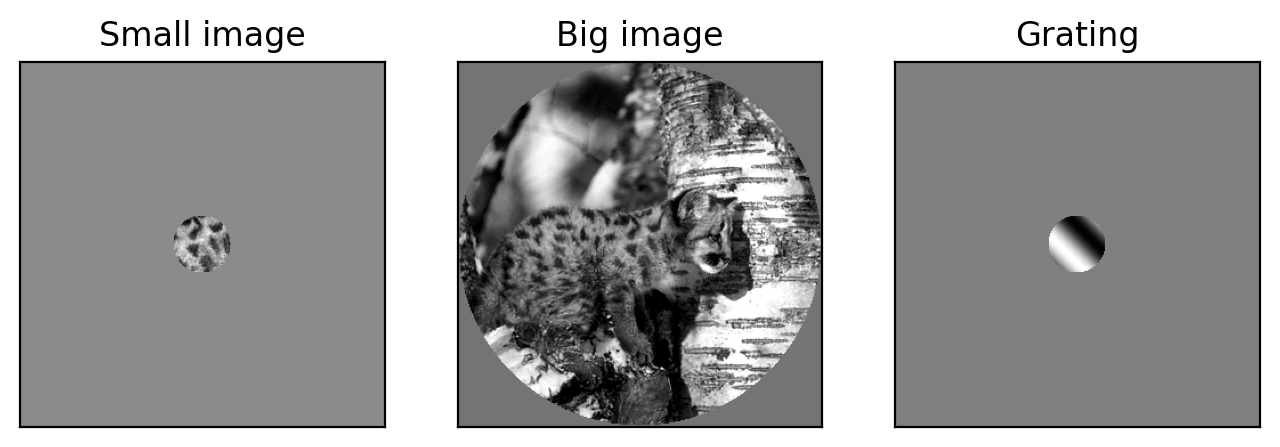

In [3]:
# plot some sample images for each category
images_all = mat['images'].squeeze()
fig, ax = plt.subplots(1, 3, figsize=(8, 8))

fig_titles = ['Small image', 'Big image', 'Grating']
fig_idx = [538, 539, 600]
for i in range(3):
    ax[i].imshow(images_all[fig_idx[i]], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(fig_titles[i])

plt.show()

In [102]:
# target
target = torch.load(Path('data') / 'val_images_gratings.pt')

In [103]:
# load plots
#loss_hist = torch.load(Path('outputs') / 'loss_hist_train.pt')
#decoded_image = torch.load(Path('outputs') / 'decoded_image_val.pt')
#spk_rec = torch.load(Path('outputs') / 'spk_rec_val.pt')
#mem_rec = torch.load(Path('outputs') / 'mem_rec_val.pt')

In [104]:
loss_hist = torch.load('/Users/Divya/SNN Decoding - ANN/outputs/loss_hist_train.pt')
decoded_image = torch.load('/Users/Divya/SNN Decoding - ANN/outputs/decoded_image_val.pt')

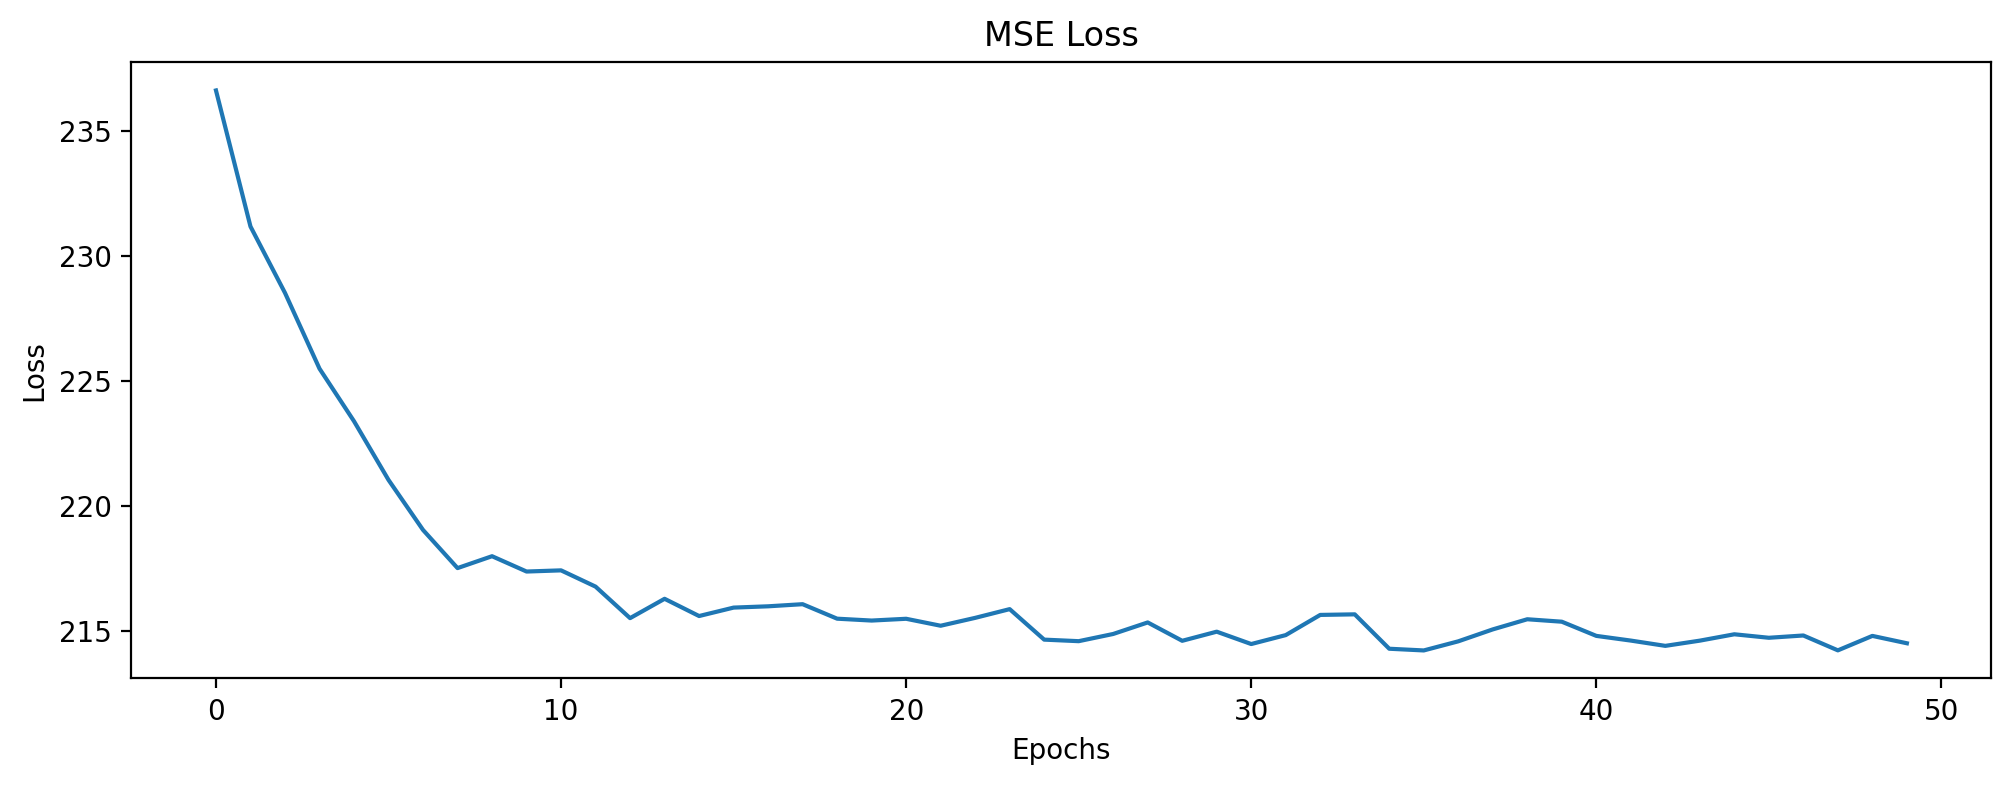

In [105]:
fig, ax = plt.subplots(figsize=(12, 4))

plt.plot(loss_hist)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MSE Loss')
plt.show()

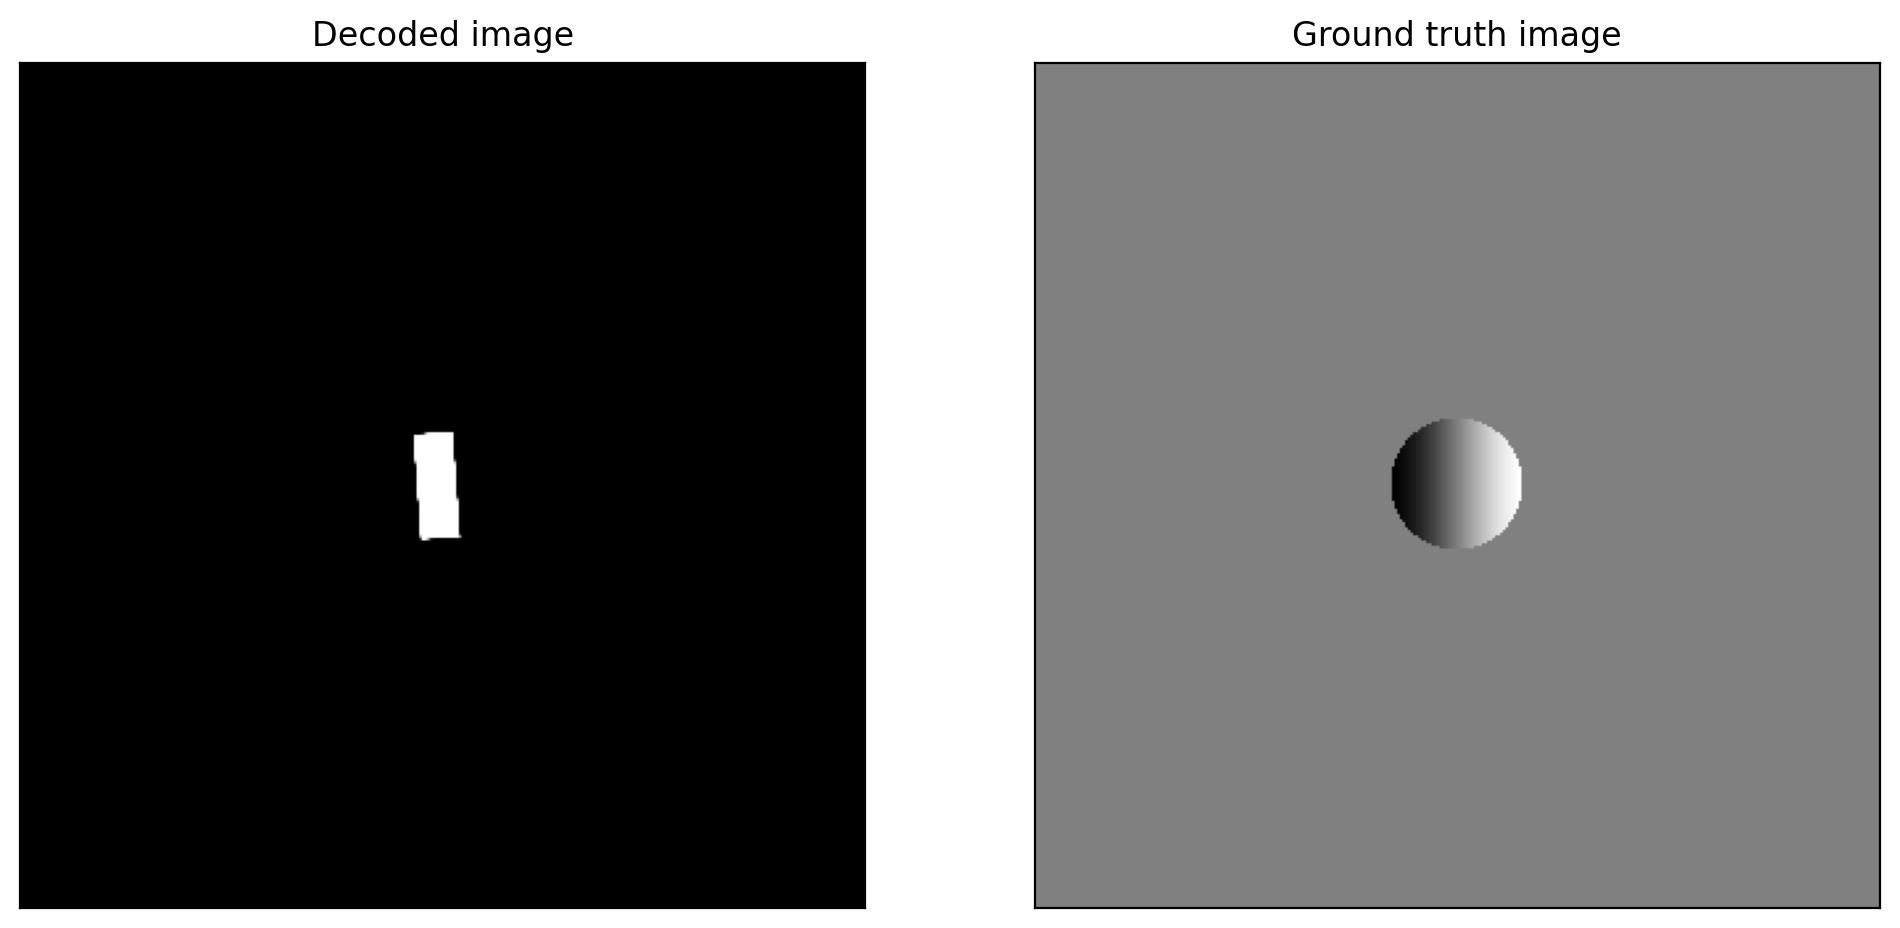

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(12, 12))

ax[0].imshow(decoded_image[0].detach().numpy(), cmap='gray')
ax[0].set_title('Decoded image')

ax[1].imshow(target[0], cmap='gray')
ax[1].set_title('Ground truth image')

for i in range(2):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()